In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from factor_analyzer import FactorAnalyzer

In [3]:
df=pd.read_csv("ObesityDataSet_raw_and_data_sinthetic.csv")
df.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


In [4]:
df.isnull().any()

Gender                            False
Age                               False
Height                            False
Weight                             True
family_history_with_overweight    False
FAVC                               True
FCVC                              False
NCP                               False
CAEC                               True
SMOKE                              True
CH2O                              False
SCC                               False
FAF                                True
TUE                               False
CALC                              False
MTRANS                            False
NObeyesdad                        False
dtype: bool

In [6]:
X = df.drop("NObeyesdad",axis=1)
y = df["NObeyesdad"]

In [7]:
catagorical =list( X.select_dtypes(include='object').columns )
numerical = list( X.select_dtypes(exclude='object').columns )

In [8]:
for cat in catagorical:
    df[cat].fillna(df[cat].mode()[0],inplace=True)

In [9]:
for num in numerical:
    df[num].fillna(df[num].mean(),inplace=True)

In [10]:
df.isnull().any()

Gender                            False
Age                               False
Height                            False
Weight                            False
family_history_with_overweight    False
FAVC                              False
FCVC                              False
NCP                               False
CAEC                              False
SMOKE                             False
CH2O                              False
SCC                               False
FAF                               False
TUE                               False
CALC                              False
MTRANS                            False
NObeyesdad                        False
dtype: bool

# EDA

Text(0.5, 1.0, 'Count of target variable')

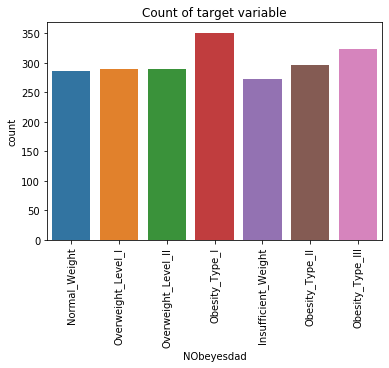

In [11]:
sns.countplot(df["NObeyesdad"])
plt.xticks(rotation="vertical")
plt.title("Count of target variable")

Text(0.5, 1.0, 'Correlation Heat-Map')

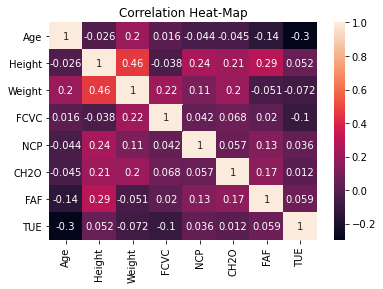

In [5]:
sns.heatmap(df.corr(),annot=True)
plt.title("Correlation Heat-Map")

Text(0.5, 1.0, 'Distribution plot for Height variable')

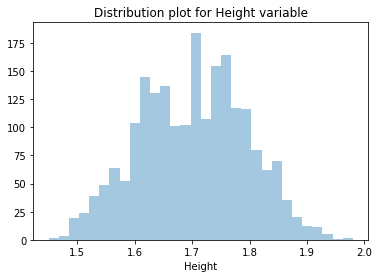

In [7]:
sns.distplot(df['Height'],kde=False,bins=30)
plt.title("Distribution plot for Height variable")

Text(0.5, 1.0, 'Height Vs Nobeyesdad')

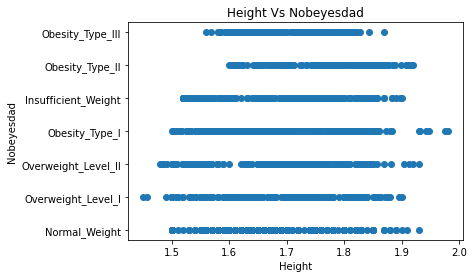

In [8]:
plt.scatter(x='Height',y='NObeyesdad',data=df)
plt.xlabel('Height')
plt.ylabel('Nobeyesdad')
plt.title("Height Vs Nobeyesdad")

Text(0.5, 1.0, 'Weight Vs NObeyesdad')

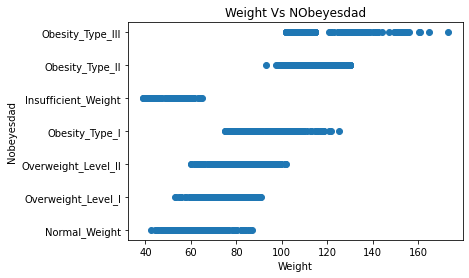

In [9]:
plt.scatter(x='Weight',y='NObeyesdad',data=df)
plt.ylabel('Nobeyesdad')
plt.xlabel('Weight')
plt.title("Weight Vs NObeyesdad")

Text(0.0, 1.0, 'Height Vs Weight')

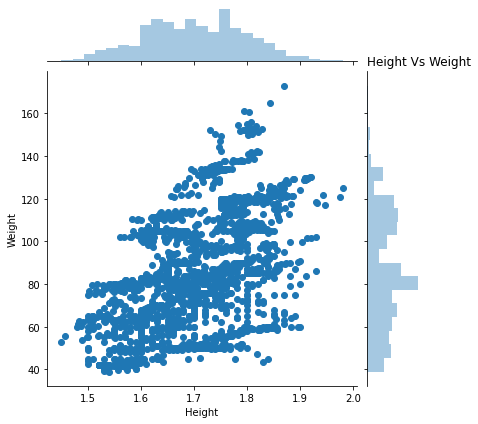

In [18]:
sns.jointplot(x='Height',y='Weight',data=df,kind='scatter')
plt.title("Height Vs Weight",loc='left')

Text(0.5, 1.0, 'Age Vs NObeyesdad')

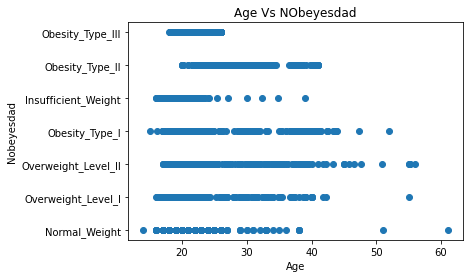

In [19]:
plt.scatter(x='Age',y='NObeyesdad',data=df)
plt.xlabel('Age')
plt.ylabel('Nobeyesdad')
plt.title("Age Vs NObeyesdad")

Text(0.5, 1.0, 'Box Plot- NObeyesdad Vs Age')

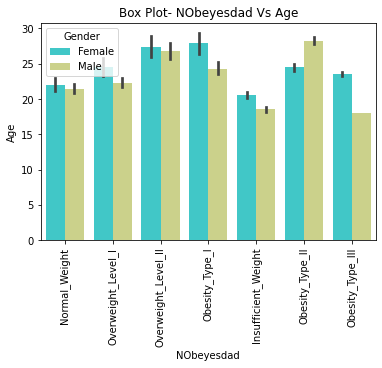

In [20]:
sns.barplot(df['NObeyesdad'],df['Age'],hue=df['Gender'],palette='rainbow')
plt.xticks(rotation='vertical')
plt.title("Box Plot- NObeyesdad Vs Age")

Text(0.5, 1.0, 'Age Vs Weight')

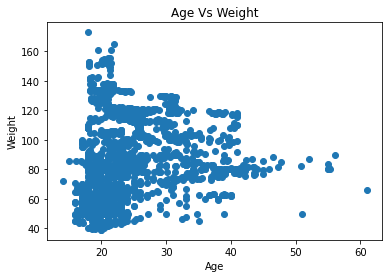

In [21]:
plt.scatter(x='Age',y='Weight',data=df)
plt.xlabel('Age')
plt.ylabel('Weight')
plt.title('Age Vs Weight')

Text(0.5, 1.0, 'Consumption of water daily Vs NObeyesdad')

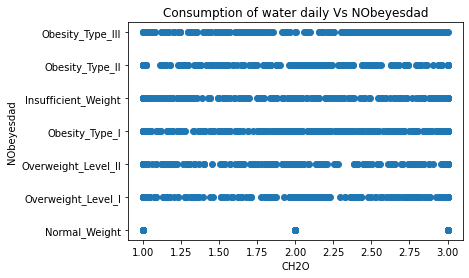

In [22]:
plt.scatter(x='CH2O',y='NObeyesdad',data=df)
plt.xlabel('CH2O')
plt.ylabel('NObeyesdad')
plt.title('Consumption of water daily Vs NObeyesdad')

Text(0.5, 1.0, 'Count of Nobeyesdad')

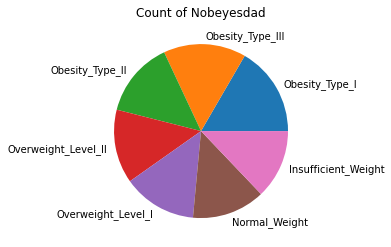

In [60]:
o_count=df['NObeyesdad'].value_counts()
plt.pie(o_count,labels=o_count.index)
plt.title("Count of Nobeyesdad")

In [66]:
f_count=df['Gender'].value_counts()
f_count

Male      1068
Female    1043
Name: Gender, dtype: int64

In [64]:
# Creating autocpt arguments 
def func(pct, allvalues): 
    absolute = int(pct / 100.*np.sum(allvalues)) 
    return "{:.1f}%\n({:d} )".format(pct, absolute) 

Text(0.5, 1.0, 'Count of Gender')

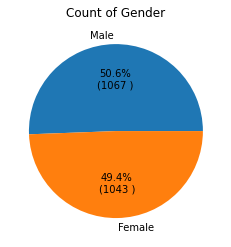

In [67]:
plt.pie(f_count,labels=f_count.index,autopct = lambda pct: func(pct, f_count))
plt.title("Count of Gender")

Text(0.5, 1.0, 'Family history with overweight Vs NObeyesdad')

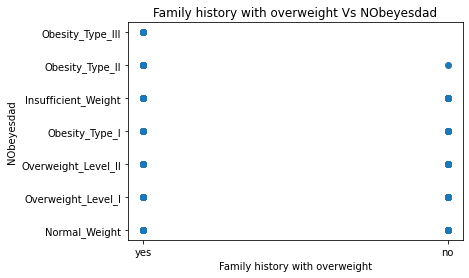

In [27]:
plt.scatter(x='family_history_with_overweight',y='NObeyesdad',data=df)
plt.xlabel('Family history with overweight')
plt.ylabel('NObeyesdad')
plt.title('Family history with overweight Vs NObeyesdad')

Text(0.5, 1.0, 'Count of Family history with overweight')

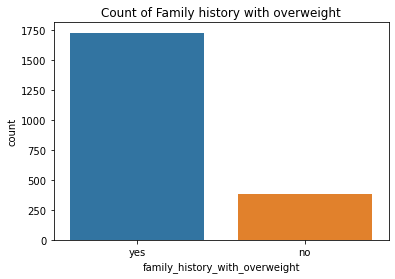

In [28]:
sns.countplot(df['family_history_with_overweight'])
plt.title('Count of Family history with overweight')

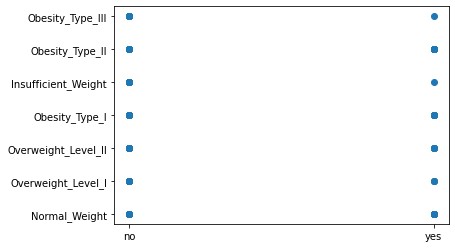

In [19]:
plt.scatter(x='SMOKE',y='NObeyesdad',data=df)


Text(0.5, 1.0, 'Count of SMOKING People')

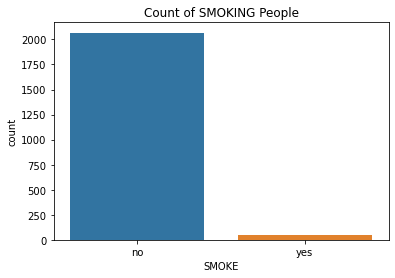

In [30]:
sns.countplot(df['SMOKE'])
plt.title("Count of SMOKING People")

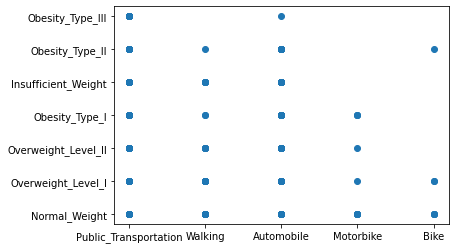

In [21]:
plt.scatter(x='MTRANS',y='NObeyesdad',data=df)

Text(0.5, 1.0, 'Frequency of consuming high caloric food')

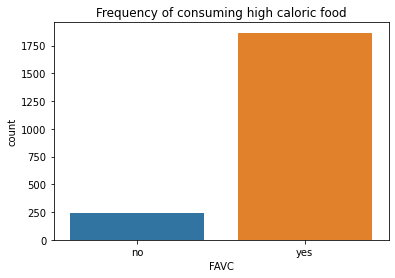

In [32]:
sns.countplot(df['FAVC'])
plt.title('Frequency of consuming high caloric food')

Text(0.5, 1.0, 'Frequency of consuming food between meals')

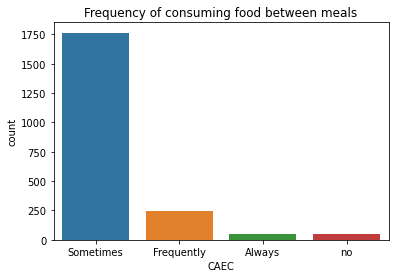

In [34]:
sns.countplot(df['CAEC'])
plt.title('Frequency of consuming food between meals')

Text(0.5, 1.0, 'Frequency of consumption of alcohol')

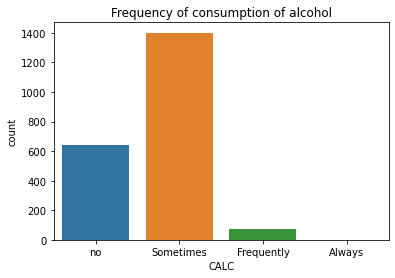

In [35]:
sns.countplot(df['CALC'])
plt.title('Frequency of consumption of alcohol')

Text(0.5, 1.0, 'Box plot for Consumption of food between meals Vs Age')

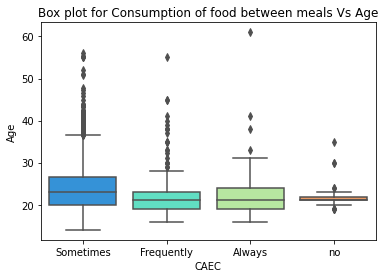

In [37]:
sns.boxplot(x="CAEC", y="Age", data=df,palette='rainbow')
plt.title('Box plot for Consumption of food between meals Vs Age')

Text(0.5, 1.0, 'Box plot for Consumption of Alcohol Vs Age')

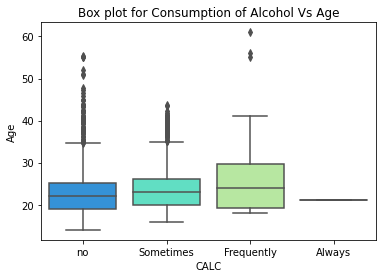

In [38]:
sns.boxplot(x="CALC", y="Age", data=df,palette='rainbow')
plt.title('Box plot for Consumption of Alcohol Vs Age')

Text(0.5, 1.0, 'Violin plot for transportation used Vs Age')

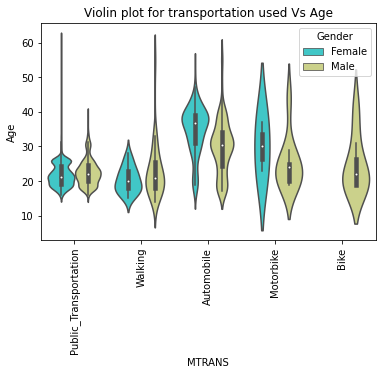

In [39]:
sns.violinplot(x="MTRANS", y="Age",hue='Gender',data=df,palette='rainbow')
plt.xticks(rotation='vertical')
plt.title('Violin plot for transportation used Vs Age')

Text(0.5, 1.0, 'Stripplot for consumption of high caloric food Vs Weight')

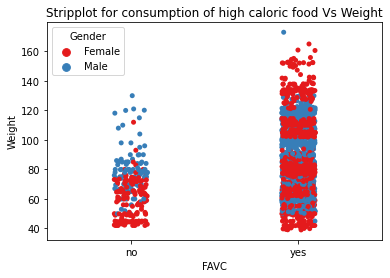

In [40]:
sns.stripplot(x="FAVC", y="Weight", data=df,jitter=True,hue='Gender',palette='Set1')
plt.title('Stripplot for consumption of high caloric food Vs Weight')

C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\categorical.py:2781: UserWarning: The `split` parameter has been renamed to `dodge`.
  warnings.warn(msg, UserWarning)


Text(0.5, 1.0, 'Consumption of high caloric food Vs Age')

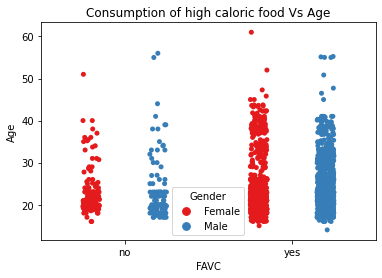

In [41]:
sns.stripplot(x="FAVC", y="Age", data=df,jitter=True,hue='Gender',split=True,palette='Set1')
plt.title('Consumption of high caloric food Vs Age')

Text(0.5, 1.0, 'Consumption of high caloric food Vs Frequency of physical activity')

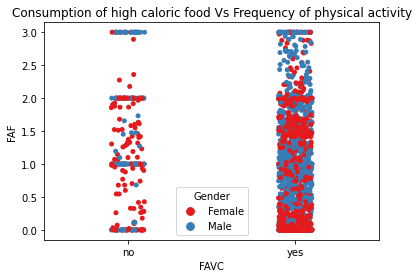

In [42]:
sns.stripplot(x="FAVC", y="FAF", data=df,jitter=True,hue='Gender',palette='Set1')
plt.title('Consumption of high caloric food Vs Frequency of physical activity')

Text(0.5, 1.0, 'Consumption of food between meals Vs Age')

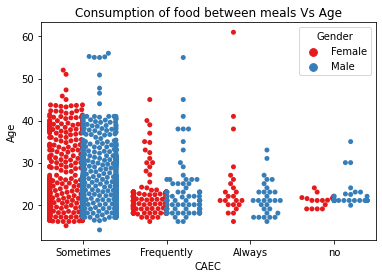

In [51]:
sns.swarmplot(x="CAEC", y="Age", data=df,hue='Gender',split=True,palette='Set1')
plt.title('Consumption of food between meals Vs Age')

Text(0.5, 1.0, 'Consumption of Alcohol Vs Age')

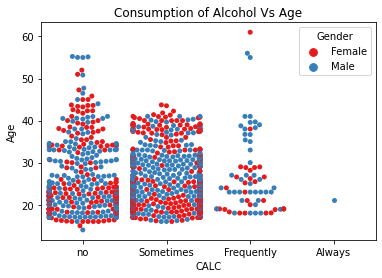

In [43]:
sns.swarmplot(x="CALC", y="Age", data=df,hue='Gender',palette='Set1')
plt.title('Consumption of Alcohol Vs Age')

Text(0.5, 1.0, 'Violin plot for NObeyesdad Vs time using technology devices')

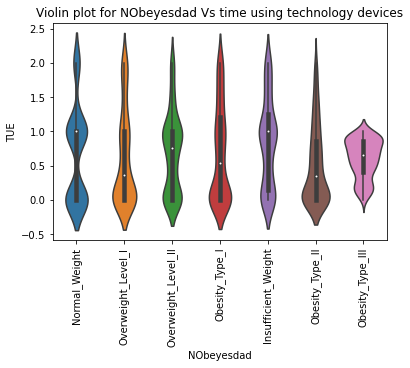

In [45]:
sns.violinplot(x='NObeyesdad',y='TUE',data=df)
plt.xticks(rotation='vertical')
plt.title('Violin plot for NObeyesdad Vs time using technology devices')

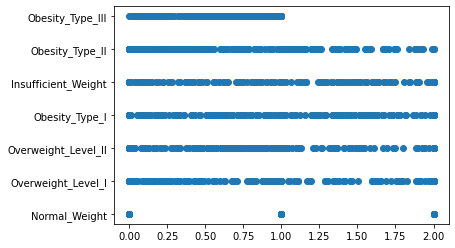

In [33]:
plt.scatter(df['TUE'],df['NObeyesdad'])

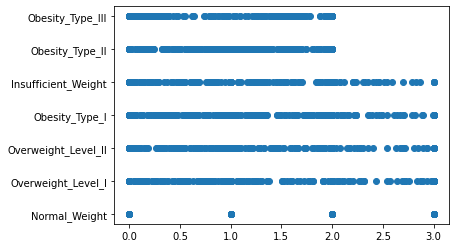

In [34]:
plt.scatter(df['FAF'],df['NObeyesdad'])

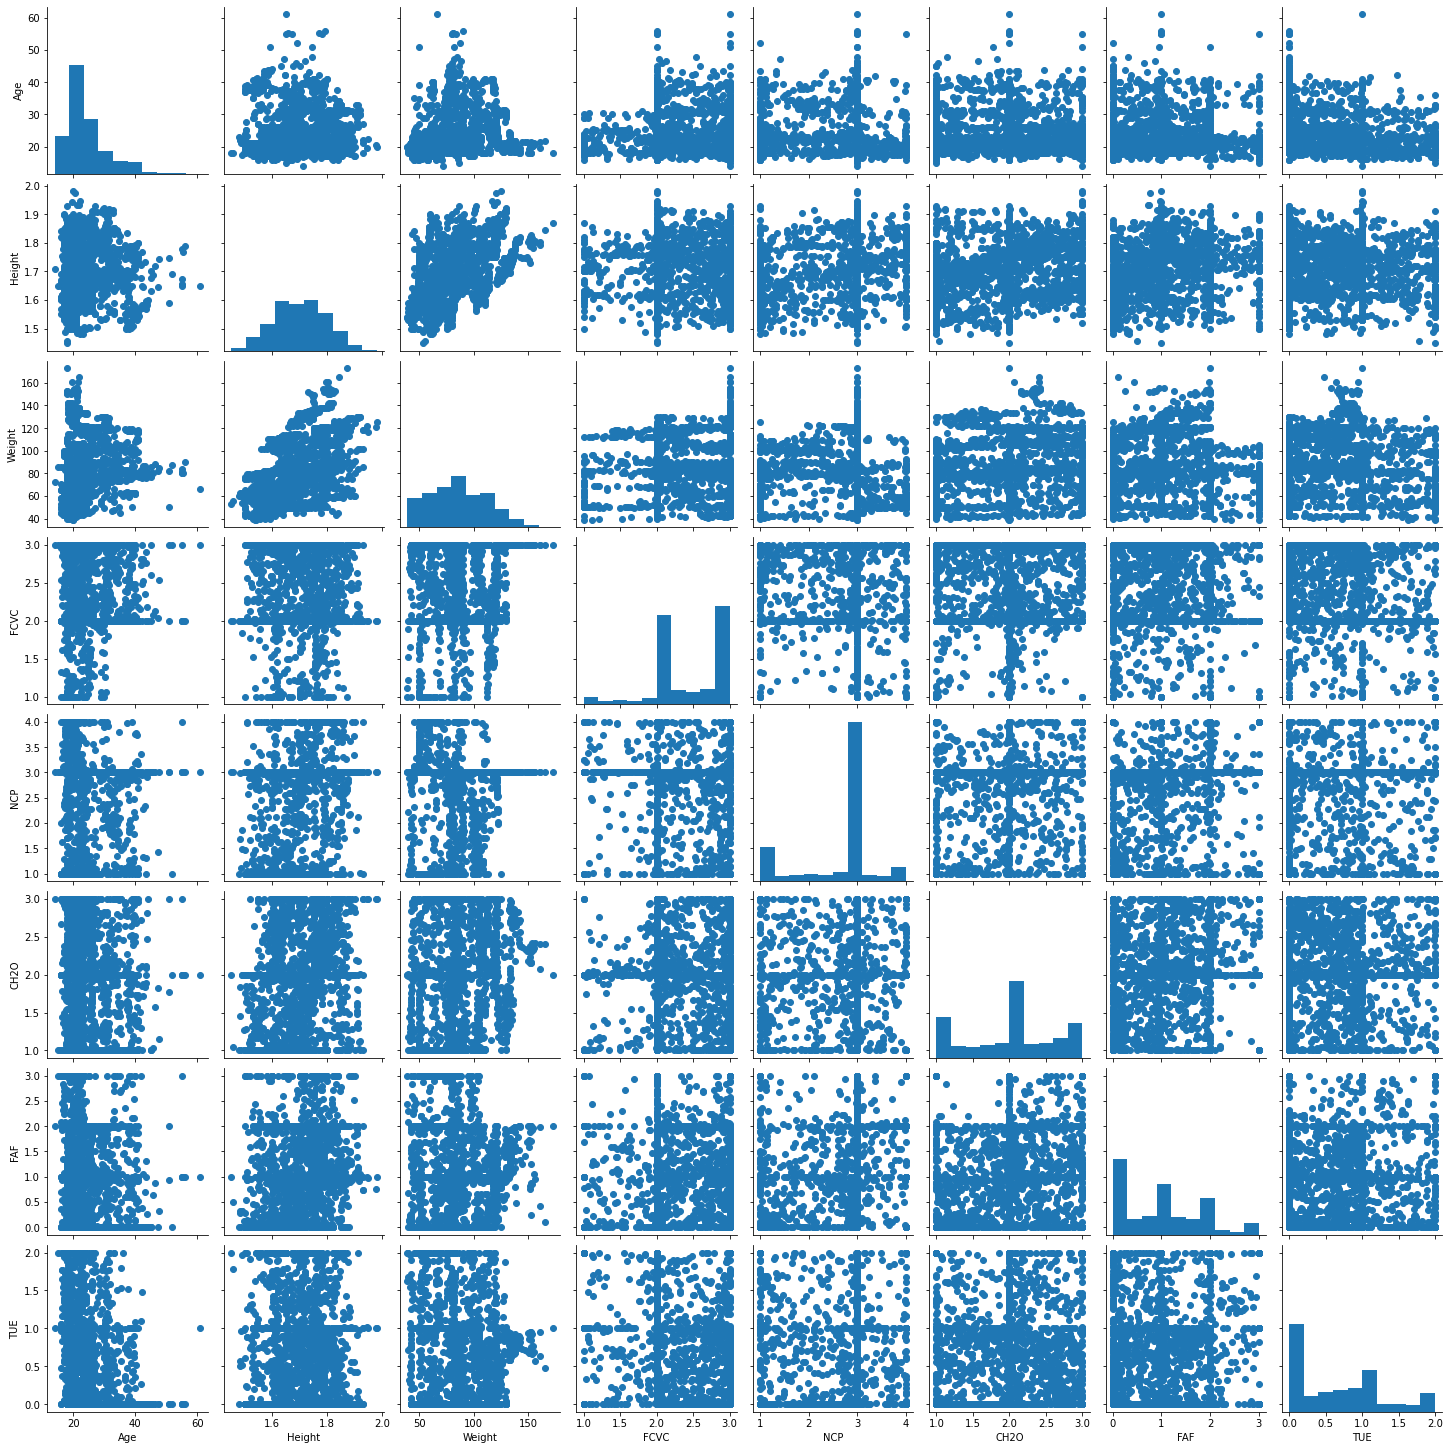

In [40]:
pg=sns.PairGrid(df)
pg.map_upper(plt.scatter)
pg.map_diag(plt.hist)
pg.map_lower(plt.scatter)

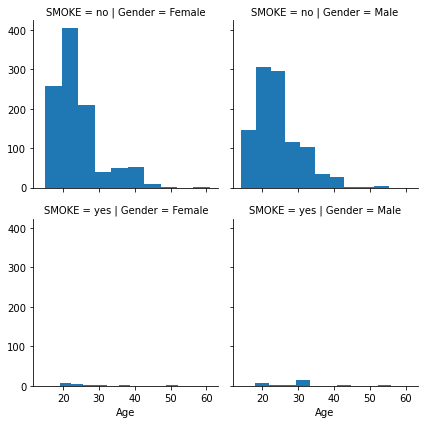

In [47]:
fg = sns.FacetGrid(df, col="Gender",  row="SMOKE")
fg = fg.map(plt.hist,"Age")

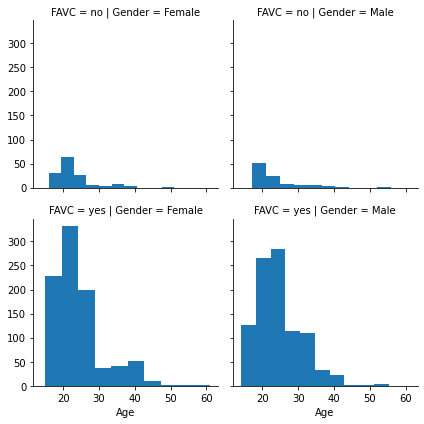

In [44]:
fg = sns.FacetGrid(df, col="Gender",  row="FAVC")
fg = fg.map(plt.hist,"Age")

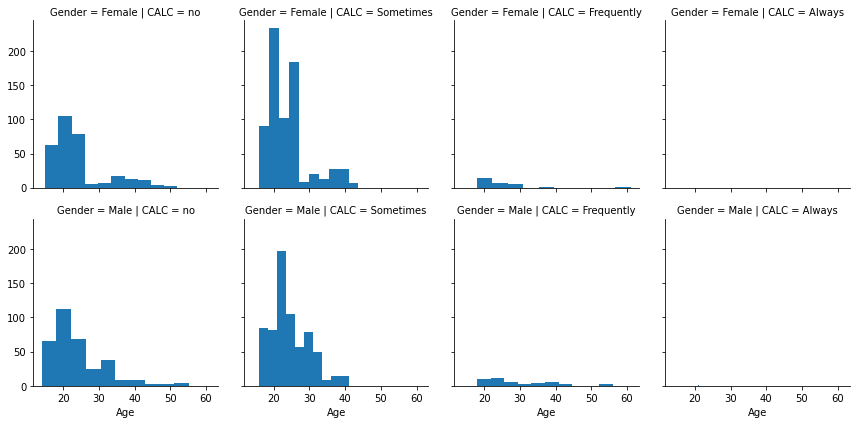

In [46]:
fg = sns.FacetGrid(df, col="CALC",  row="Gender")
fg = fg.map(plt.hist,"Age")